In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
accidentes = pd.read_csv("accidentes.csv")
ubicacion = pd.read_csv("ubicacion.csv")
clima = pd.read_csv("clima.csv")
via = pd.read_csv("via.csv")

In [ ]:
clima

In [37]:
accidentes.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
ID_ACCIDENTE,101996.0,50998.50,29443.85,1.0,25499.75,50998.5,76497.25,101996.0
ANYO,101996.0,2024.00,0.00,2024.0,2024.00,2024.0,2024.00,2024.0
MES,101996.0,6.57,3.39,1.0,4.00,7.0,10.00,12.0
DIA_SEMANA,101996.0,3.87,1.94,1.0,2.00,4.0,5.00,7.0
HORA,101996.0,13.71,5.30,0.0,10.00,14.0,18.00,23.0
TOTAL_MU30DF,101996.0,0.02,0.14,0.0,0.00,0.0,0.00,6.0
TOTAL_HG30DF,101996.0,0.09,0.33,0.0,0.00,0.0,0.00,9.0
TOTAL_HL30DF,101996.0,1.23,0.86,0.0,1.00,1.0,1.00,40.0


## Procedemos al análisis

### 1. Accidentes por provincia

In [5]:
df_provincia = (
    accidentes.merge(ubicacion, on="ID_ACCIDENTE")
              .groupby("PROVINCIA_DESC")
              .size()
              .reset_index(name="total_accidentes")
              .sort_values("total_accidentes", ascending=False)
)

df_provincia


,PROVINCIA_DESC,total_accidentes
8,Barcelona,17945
31,Madrid,14183
47,Valencia,5779
32,Malaga,5185
42,Sevilla,4748
34,Murcia,3922
3,Alicante,3758
24,Islas Baleares,2888
11,Cadiz,2707
44,Tarragona,2381


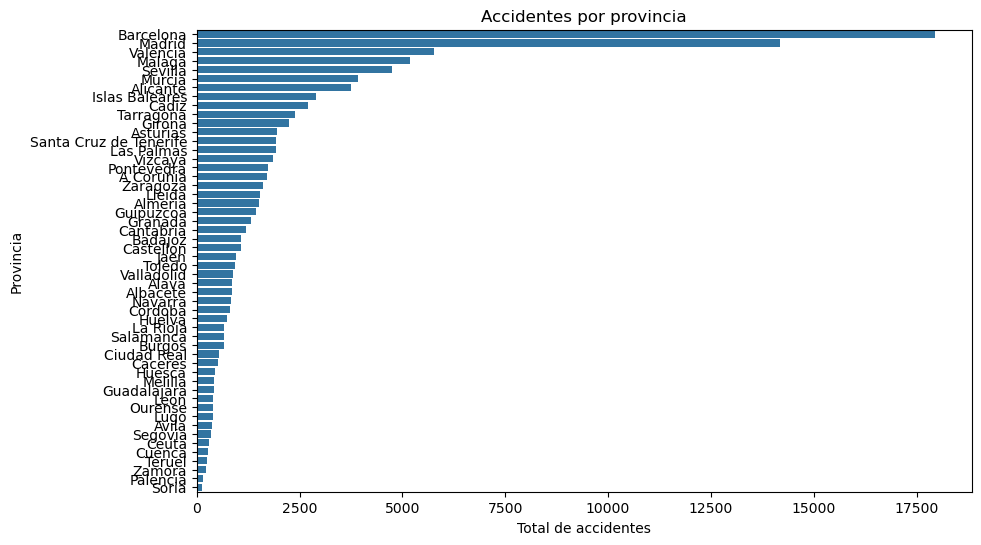

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_provincia, x="total_accidentes", y="PROVINCIA_DESC")
plt.title("Accidentes por provincia")
plt.xlabel("Total de accidentes")
plt.ylabel("Provincia")
plt.show()


### 2. Accidentes por clima

In [6]:
df_clima = (
    accidentes.merge(clima, on="ID_ACCIDENTE")
              .groupby("METEO_DESC")
              .size()
              .reset_index(name="total_accidentes")
              .sort_values("total_accidentes", ascending=False)
)

df_clima


,METEO_DESC,total_accidentes
0,Buen tiempo,86349
5,Nublado,6114
1,Lluvia debil,5834
2,Lluvia intensa,1514
4,No procede,510
3,Nieve / Granizo,73
6,Viento fuerte,53


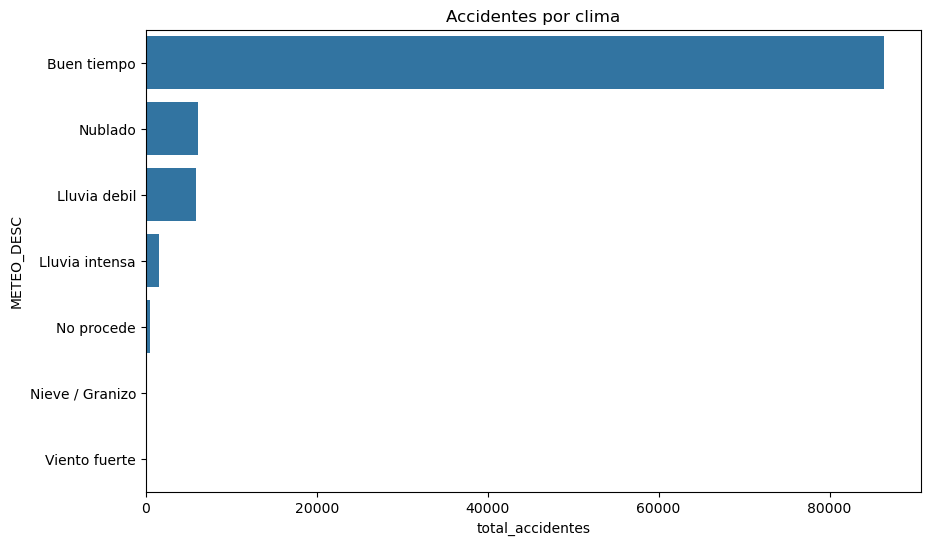

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_clima, x="total_accidentes", y="METEO_DESC")
plt.title("Accidentes por clima")
plt.show()


#### 2.1 Variantes de clima

Accidentes por iluminación:

In [7]:
df_iluminacion = (
    accidentes.merge(clima, on="ID_ACCIDENTE")
              .groupby("ILUMINACION_DESC")
              .size()
              .reset_index(name="total_accidentes")
              .sort_values("total_accidentes", ascending=False)
)
df_iluminacion

,ILUMINACION_DESC,total_accidentes
5,Plena luz del dia,72471
3,Noche sin alumbrado,14436
4,Oscuro,5856
0,Amanecer/Atardecer,3310
2,Noche con alumbrado,2711
1,No procede,499


Accidentes por estado del firme:

In [8]:
df_firme = (
    accidentes.merge(clima, on="ID_ACCIDENTE")
              .groupby("FIRME_DESC")
              .size()
              .reset_index(name="total_accidentes")
              .sort_values("total_accidentes", ascending=False)
)
df_firme

,FIRME_DESC,total_accidentes
5,Seco,87423
3,Mojado,10401
2,Humedo,828
4,No procede,498
1,Helado,197
0,Con nieve,77


## 3. Horas y días más peligrosos

### Por franja horaria

In [9]:
df_horas = (
    accidentes.groupby("FRANJA_HORARIA")
              .size()
              .reset_index(name="total_accidentes")
              .sort_values("total_accidentes", ascending=False)
)

df_horas


,FRANJA_HORARIA,total_accidentes
3,Tarde,39838
2,Noche,28433
1,Mañana,27374
0,Madrugada,6351


### Por hora exacta:

In [10]:
df_horas_exacto = (
    accidentes.groupby("HORA")
              .size()
              .reset_index(name="total_accidentes")
              .sort_values("total_accidentes", ascending=False)
)

df_horas_exacto


,HORA,total_accidentes
14,14,7675
13,13,7161
12,12,6757
18,18,6526
19,19,6445
15,15,6404
17,17,6170
11,11,5964
16,16,5671
20,20,5467


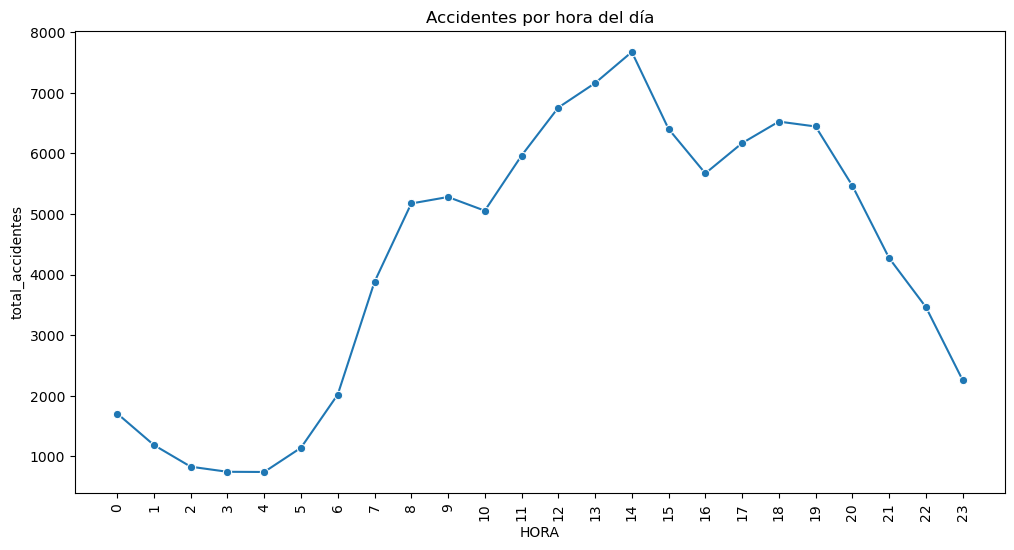

In [28]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_horas_exacto, x="HORA", y="total_accidentes", marker="o")
plt.title("Accidentes por hora del día")
plt.xticks(ticks=range(24), labels=range(24), rotation=90)
plt.show()


### Por día de la semana


In [33]:
df_dia = (
    accidentes.groupby("DIA_SEMANA_DESC")
              .size()
              .reset_index(name="total_accidentes")
              .sort_values("total_accidentes", ascending=False)
)

df_dia


,DIA_SEMANA_DESC,total_accidentes
6,Viernes,16378
2,Lunes,15270
1,Jueves,15257
3,Martes,15146
4,Miercoles,14889
5,Sabado,13483
0,Domingo,11573


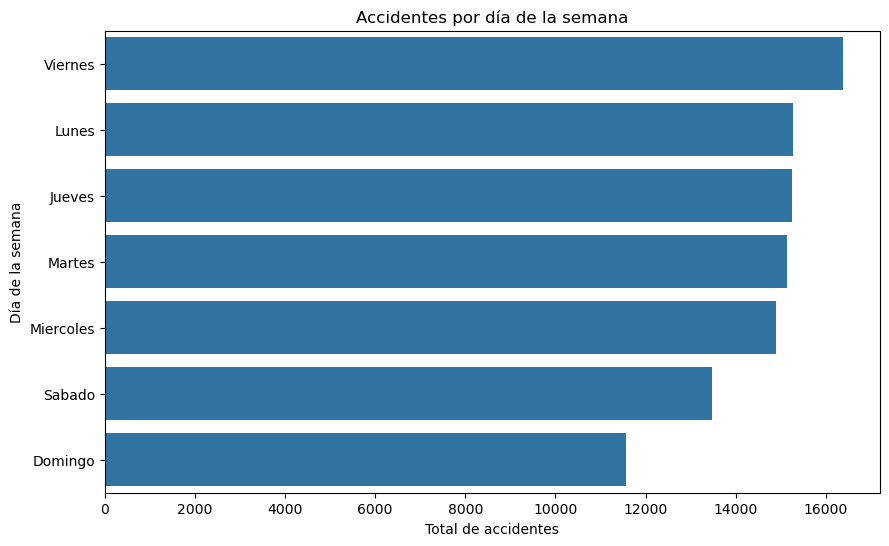

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_dia, x="total_accidentes", y="DIA_SEMANA_DESC")
plt.title("Accidentes por día de la semana")
plt.xlabel("Total de accidentes")
plt.ylabel("Día de la semana")
plt.show()

## 4. Accidentes por tipo de vía

In [20]:
df_tipo_via = (
    accidentes.merge(via, on="ID_ACCIDENTE")
              .groupby("TRAZADO_PLANTA_DESC")
              .size()
              .reset_index(name="total_accidentes")
              .sort_values("total_accidentes", ascending=False)
)

df_tipo_via


,TRAZADO_PLANTA_DESC,total_accidentes
3,No consta,64638
5,Recta,18156
0,Cambio de rasante,9524
2,Curva suave,6460
1,Curva pronunciada,3215
4,No procede,3


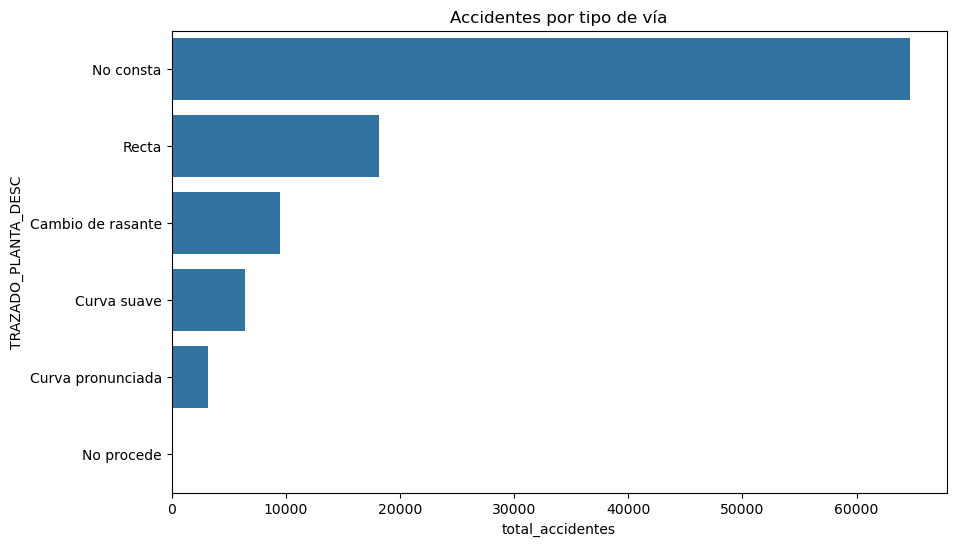

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_tipo_via, y="TRAZADO_PLANTA_DESC", x="total_accidentes")
plt.title("Accidentes por tipo de vía")
plt.show()

## 5. Comparación clima vs gravedad

In [11]:
df_lluvia_gravedad = (
    accidentes.merge(clima, on="ID_ACCIDENTE")
              .loc[lambda df: df["METEO_DESC"].isin(["Lluvia débil", "Lluvia intensa", "Buen tiempo", "Nublado"])]
              .groupby(["METEO_DESC", "GRAVEDAD_DESC"])
              .size()
              .reset_index(name="total")
              .sort_values(["METEO_DESC", "total"], ascending=[True, False])
)

df_lluvia_gravedad


,METEO_DESC,GRAVEDAD_DESC,total
1,Buen tiempo,Leve,77779
0,Buen tiempo,Grave,7162
2,Buen tiempo,Mortal,1408
4,Lluvia intensa,Leve,1373
3,Lluvia intensa,Grave,109
5,Lluvia intensa,Mortal,32
7,Nublado,Leve,5402
6,Nublado,Grave,581
8,Nublado,Mortal,131


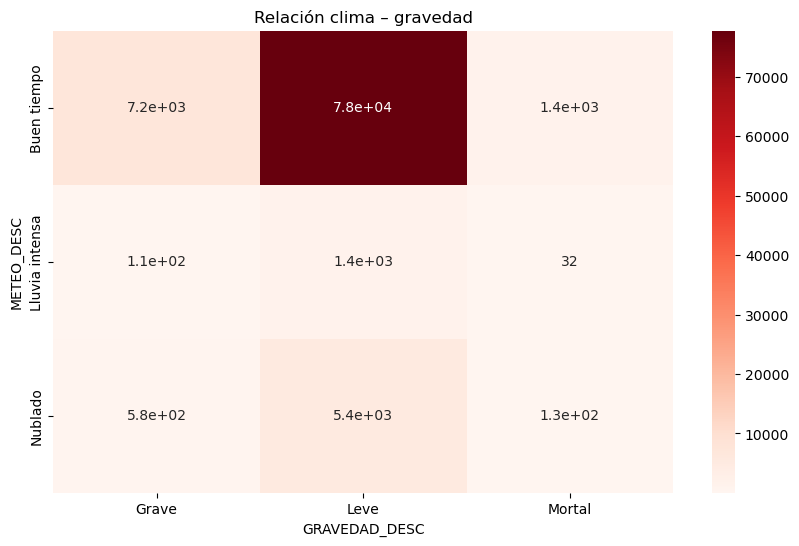

In [36]:
pivot_clima = df_lluvia_gravedad.pivot(index="METEO_DESC", columns="GRAVEDAD_DESC", values="total")

plt.figure(figsize=(10,6))
sns.heatmap(pivot_clima, annot=True, cmap="Reds")
plt.title("Relación clima – gravedad")
plt.show()


### 5.1.Gravedad media por condición climatológica

In [12]:
df_gravedad_clima = (
    accidentes.merge(clima, on="ID_ACCIDENTE")
              .groupby("METEO_DESC")
              .agg(
                  total_muertos=("TOTAL_MU30DF", "sum"),
                  total_graves=("TOTAL_HG30DF", "sum"),
                  total_leves=("TOTAL_HL30DF", "sum"),
                  total_accidentes=("ID_ACCIDENTE", "count")
              )
              .sort_values(["total_muertos", "total_graves"], ascending=False)
)

df_gravedad_clima


,total_muertos,total_graves,total_leves,total_accidentes
METEO_DESC,,,,
Buen tiempo,1515,8161,105481,86349
Nublado,144,675,7492,6114
Lluvia debil,67,421,7474,5834
Lluvia intensa,33,138,1982,1514
No procede,1,25,586,510
Nieve / Granizo,1,19,180,73
Viento fuerte,1,5,103,53


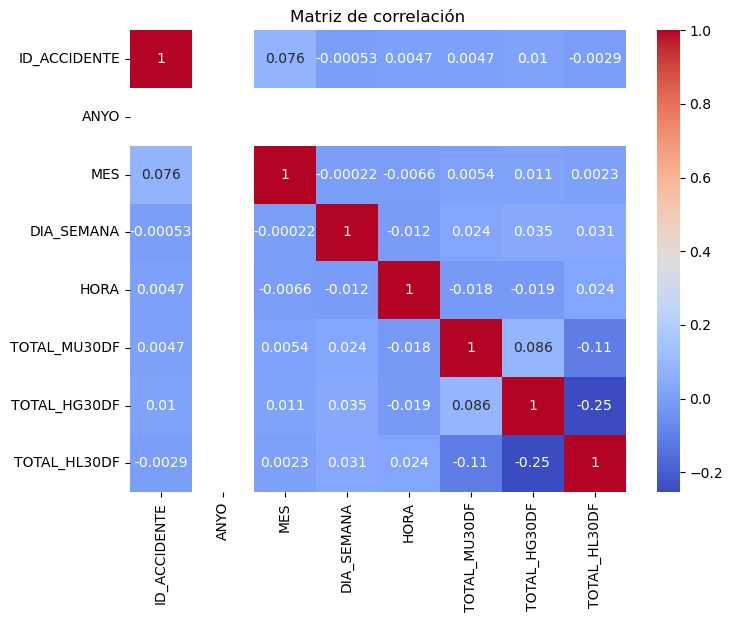

In [32]:
num_cols = accidentes.select_dtypes(include="number")

plt.figure(figsize=(8,6))
sns.heatmap(num_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()
